# Finding the suspicious indel overlap between two databases. 

Before you run this script, make sure to have run the LCR script (Figure 3) in order to get the bedfiles for the suspicious indels. Then move all the bedfiles for the suspicious indels into a new directory and set your file paths to this new directory. 

Run bash script below. 

In [1]:
system("bp_range=('10' '20' '30' '40')

date=''
output_path=''


for i in ${bp_range[@]};
do
   echo $i
   bedtools intersect -wa -a ${output_path}gnomad.exomes.r2.1.1.sites_indelsonly_rAF_bp${i}_SuspiciousIndels.lt50bp.bin.bed -b ${output_path}2023-03-23_IGM_n39367_indelsonly_rAF_bp${i}_SuspiciousIndels.lt50bp.bin.bed | sort -k1,1n -k2,2n | uniq > ${output_path}${date}_df1_overlap_bp${i}.bed 
   bedtools intersect -wa -a ${output_path}2023-03-23_IGM_n39367_indelsonly_rAF_bp${i}_SuspiciousIndels.lt50bp.bin.bed -b ${output_path}gnomad.exomes.r2.1.1.sites_indelsonly_rAF_bp${i}_SuspiciousIndels.lt50bp.bin.bed | sort -k1,1n -k2,2n | uniq > ${output_path}${date}_df2_overlap_bp${i}.bed 
done;", intern = TRUE)



[1] "10" "20" "30" "40"

Here begins the R code.

In [2]:
library(tidyverse)
library(data.table)
library(readxl)
library(dplyr)
library(stringr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.1     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




Define bp ranges. 

In [3]:
bp_range = c("10", "20", "30", "40")

Define dfs. 

In [4]:
df_name_1 = "gnomAD"
df_name_2 = "IGM"

Define output path and date of input files. 

In [5]:
## define output_path
output_path = ""
## define_date
date = ""

Calculate overlap. 

In [6]:
for (j in bp_range) {
  # get files
  total_df1 = paste0(output_path, "gnomad.exomes.r2.1.1.sites_indelsonly_rAF_bp", j, "_SuspiciousIndels.lt50bp.bin.bed")
  total_df2 = paste0(output_path, "2023-03-23_IGM_n39367_indelsonly_rAF_bp", j, "_SuspiciousIndels.lt50bp.bin.bed")
  
  overlap_file_1 = paste0(output_path, date, "_df1_overlap_bp", j,".bed")
  overlap_file_2 = paste0(output_path, date, "_df2_overlap_bp", j,".bed")

  ## find total number of suspicious bins 
  n_total_df1 = paste0("df1_total_bp_", j)
  n_total_df2 = paste0("df2_total_bp_", j)
  
  assign( n_total_df1 , nrow(fread(total_df1)))
  assign( n_total_df2 , nrow(fread(total_df2)))
  
  ## find total number of overlapping bins 
  n_overlap1 = paste0("df1_overlap_bp", j)
  n_overlap2 = paste0("df2_overlap_bp", j)
  
  assign(n_overlap1, nrow(fread(overlap_file_1)))
  assign(n_overlap2, nrow(fread(overlap_file_2)))

  print(paste0(n_overlap1, ": ", get(n_overlap1)))
  print(paste0(n_overlap2, ": ", get(n_overlap2)))
  
  # get not overlapping
  n_not_overlap_df1 = paste0("not_overlap_bp_", j,"_df_1")
  n_not_overlap_df2 = paste0("not_overlap_bp_", j,"_df_2")

  assign( n_not_overlap_df1, get(n_total_df1) - get(n_overlap1))
  assign( n_not_overlap_df2, get(n_total_df2) - get(n_overlap2))
  
  print(paste0( n_not_overlap_df1, ": ", get( n_not_overlap_df1)))
  print(paste0( n_not_overlap_df2, ": ", get( n_not_overlap_df2)))
  
  # get percentages of overlapping 
  prct_overlap_df1 = paste0("prct_overlap_bp_", j, "_df_1")
  prct_overlap_df2 = paste0("prct_overlap_bp_", j, "_df_2")
  
  assign(prct_overlap_df1, paste0(round(get(n_overlap1)/get(n_total_df1) * 100, 0), "%"))
  assign(prct_overlap_df2, paste0(round(get(n_overlap2)/get(n_total_df2) * 100, 0), "%"))

  print(paste0( prct_overlap_df1, ": ", get( prct_overlap_df1)))
  print(paste0( prct_overlap_df2, ": ", get( prct_overlap_df2)))

  # get percentages of not overlaping 
  prct_not_overlap_df1 = paste0("prct_not_overlap_bp_", j, "_df_1")
  prct_not_overlap_df2 = paste0("prct_not_overlap_bp_", j, "_df_2")

  assign( prct_not_overlap_df1, paste0(round(get(n_not_overlap_df1)/get(n_total_df1) * 100, 0), "%"))
  assign( prct_not_overlap_df2, paste0(round(get(n_not_overlap_df2)/get(n_total_df2) * 100, 0), "%"))

  print(paste0( prct_not_overlap_df1, ": ", get( prct_not_overlap_df1)))
  print(paste0( prct_not_overlap_df2, ": ", get( prct_not_overlap_df2)))
}


[1] "df1_overlap_bp10: 3692"
[1] "df2_overlap_bp10: 3759"
[1] "not_overlap_bp_10_df_1: 27913"
[1] "not_overlap_bp_10_df_2: 4989"
[1] "prct_overlap_bp_10_df_1: 12%"
[1] "prct_overlap_bp_10_df_2: 43%"
[1] "prct_not_overlap_bp_10_df_1: 88%"
[1] "prct_not_overlap_bp_10_df_2: 57%"
[1] "df1_overlap_bp20: 4109"
[1] "df2_overlap_bp20: 4195"
[1] "not_overlap_bp_20_df_1: 30903"
[1] "not_overlap_bp_20_df_2: 6083"
[1] "prct_overlap_bp_20_df_1: 12%"
[1] "prct_overlap_bp_20_df_2: 41%"
[1] "prct_not_overlap_bp_20_df_1: 88%"
[1] "prct_not_overlap_bp_20_df_2: 59%"
[1] "df1_overlap_bp30: 4449"
[1] "df2_overlap_bp30: 4529"
[1] "not_overlap_bp_30_df_1: 32675"
[1] "not_overlap_bp_30_df_2: 6908"
[1] "prct_overlap_bp_30_df_1: 12%"
[1] "prct_overlap_bp_30_df_2: 40%"
[1] "prct_not_overlap_bp_30_df_1: 88%"
[1] "prct_not_overlap_bp_30_df_2: 60%"
[1] "df1_overlap_bp40: 4728"
[1] "df2_overlap_bp40: 4799"
[1] "not_overlap_bp_40_df_1: 34231"
[1] "not_overlap_bp_40_df_2: 7579"
[1] "prct_overlap_bp_40_df_1: 12%"
[1] "

In [7]:
df1_overlap_n = c(df1_overlap_bp10, df1_overlap_bp20, df1_overlap_bp30, df1_overlap_bp40)
df1_overlap_pct = c(prct_overlap_bp_10_df_1, prct_overlap_bp_20_df_1, prct_overlap_bp_30_df_1, prct_overlap_bp_40_df_1)
df1_not_overlap_n = c(not_overlap_bp_10_df_1, not_overlap_bp_20_df_1, not_overlap_bp_30_df_1, not_overlap_bp_40_df_1)
df1_not_overlap_pct = c(prct_not_overlap_bp_10_df_1, prct_not_overlap_bp_20_df_1, prct_not_overlap_bp_30_df_1, prct_not_overlap_bp_40_df_1)

df2_overlap_n = c(df2_overlap_bp10, df2_overlap_bp20, df2_overlap_bp30, df2_overlap_bp40)
df2_overlap_pct = c(prct_overlap_bp_10_df_2, prct_overlap_bp_20_df_2, prct_overlap_bp_30_df_2, prct_overlap_bp_40_df_2)
df2_not_overlap_n = c(not_overlap_bp_10_df_2, not_overlap_bp_20_df_2, not_overlap_bp_30_df_2, not_overlap_bp_40_df_2)
df2_not_overlap_pct = c(prct_not_overlap_bp_10_df_2, prct_not_overlap_bp_20_df_2, prct_not_overlap_bp_30_df_2, prct_not_overlap_bp_40_df_2)

df_summary = data.frame(bp_range, df1_overlap_n , df1_overlap_pct, df1_not_overlap_n, df1_not_overlap_pct, df2_overlap_n , df2_overlap_pct, df2_not_overlap_n, df2_not_overlap_pct)
df_summary

bp_range,df1_overlap_n,df1_overlap_pct,df1_not_overlap_n,df1_not_overlap_pct,df2_overlap_n,df2_overlap_pct,df2_not_overlap_n,df2_not_overlap_pct
<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>
10,3692,12%,27913,88%,3759,43%,4989,57%
20,4109,12%,30903,88%,4195,41%,6083,59%
30,4449,12%,32675,88%,4529,40%,6908,60%
40,4728,12%,34231,88%,4799,39%,7579,61%


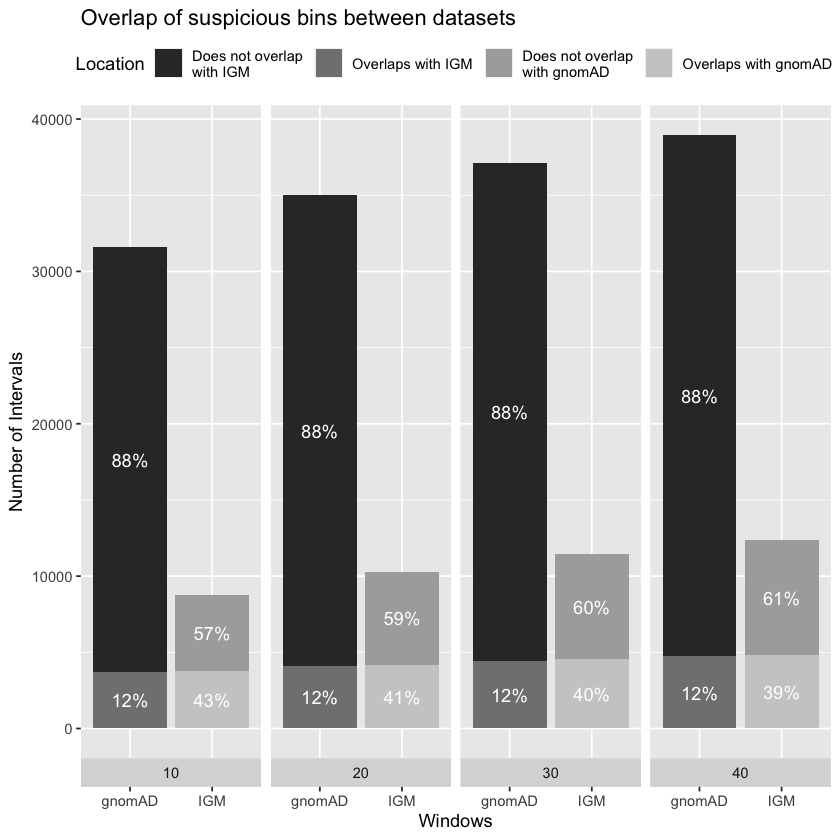

In [8]:
windows = c(rep(bp_range, 4))
region = c(rep("overlap", 4), rep("not overlap", 4), rep("overlap", 4), rep("not overlap", 4))
df_labels = c(rep(df_name_1, 8), rep(df_name_2, 8))


num_indels = c(df1_overlap_n, df1_not_overlap_n, df2_overlap_n, df2_not_overlap_n)
prct_indels = c(df1_overlap_pct, df1_not_overlap_pct, df2_overlap_pct, df2_not_overlap_pct)


graph_df = data.frame(windows, region, num_indels, prct_indels, df_labels)

graph = ggplot(graph_df, aes(x = df_labels, y = num_indels, fill = interaction(region, df_labels))) + geom_bar(stat = "identity", position = "stack") + facet_grid(~windows, switch = "both")  +  theme(legend.position = "top") + labs(title = paste0("Overlap of suspicious bins between datasets" ), y = "Number of Intervals", x = "Windows", fill = "Location") +  geom_text(aes(label = prct_indels), color = "white", position = position_stack(vjust = 0.5)) + scale_fill_grey(labels = c( str_wrap(paste0("Does not overlap with ", df_name_2), width = 20), str_wrap(paste0 ("Overlaps with ", df_name_2), width = 20), str_wrap(paste0("Does not overlap with ", df_name_1), width = 20), str_wrap(paste0 ("Overlaps with ", df_name_1), width = 20)))

graph

In [9]:
ggsave("Fig7.jpg", width = 20, height = 15, units = c("cm"), dpi = 300)